# Feature Engineering

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE #A feature selection technique
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime #Handles date and time data
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/intern ai/processed_energy_data.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,-1.217324,0.958298,-0.147777,-2.684267,0.828905,1.226233,1.799947,0.367016,-0.807974,-0.807974
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,-1.200778,0.965526,-0.170232,-2.684267,0.828905,1.088599,1.799947,0.343175,-0.440240,-0.440240
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,-1.233869,0.951070,-0.192686,-2.684267,0.828905,0.950965,1.687977,0.319333,0.252109,0.252109
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.215141,-2.684267,0.828905,0.813331,1.320076,0.295491,1.408801,1.408801
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.237595,-2.684267,0.828905,0.675697,0.952175,0.271649,-1.028122,-1.028122


In [ ]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,-1.217324,0.958298,-0.147777,-2.684267,0.828905,1.226233,1.799947,0.367016,-0.807974,-0.807974
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,-1.200778,0.965526,-0.170232,-2.684267,0.828905,1.088599,1.799947,0.343175,-0.440240,-0.440240
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,-1.233869,0.951070,-0.192686,-2.684267,0.828905,0.950965,1.687977,0.319333,0.252109,0.252109
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.215141,-2.684267,0.828905,0.813331,1.320076,0.295491,1.408801,1.408801
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,-1.233869,0.926976,-0.237595,-2.684267,0.828905,0.675697,0.952175,0.271649,-1.028122,-1.028122


## 1. Time-Based Features

In [ ]:
#People use appliances differently at different times of day
data['hour'] = data['date'].dt.hour

#Usage patterns differ between weekdays and weekends
data['day_of_week'] = data['date'].dt.dayofweek

#Seasonal variations affect energy consumption
data['month'] = data['date'].dt.month

#differentiate between workdays and weekends
data['weekday'] = data['date'].dt.dayofweek < 5  # True for weekdays

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week,month,weekday
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,0.828905,1.226233,1.799947,0.367016,-0.807974,-0.807974,17,0,1,True
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,0.828905,1.088599,1.799947,0.343175,-0.440240,-0.440240,17,0,1,True
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,0.828905,0.950965,1.687977,0.319333,0.252109,0.252109,17,0,1,True
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,0.828905,0.813331,1.320076,0.295491,1.408801,1.408801,17,0,1,True
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,0.828905,0.675697,0.952175,0.271649,-1.028122,-1.028122,17,0,1,True


## 2. Rolling Averages and Moving Windows:

In [ ]:
window_sizes = [3, 6, 12]
for window in window_sizes:
    data[f'rolling_mean_{window}'] = data['Appliances'].rolling(window=window).mean()
    data[f'rolling_std_{window}'] = data['Appliances'].rolling(window=window).std()

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,hour,day_of_week,month,weekday,rolling_mean_3,rolling_std_3,rolling_mean_6,rolling_std_6,rolling_mean_12,rolling_std_12
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,17,0,1,True,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,17,0,1,True,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,17,0,1,True,56.666667,5.773503,NaN,NaN,NaN,NaN
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,17,0,1,True,53.333333,5.773503,NaN,NaN,NaN,NaN
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,17,0,1,True,53.333333,5.773503,NaN,NaN,NaN,NaN


## 3. Lagged Features

                 date  Appliances  Appliances_lag_10  Appliances_lag_30  \
0 2016-01-11 17:00:00          60                NaN                NaN   
1 2016-01-11 17:10:00          60               60.0                NaN   
2 2016-01-11 17:20:00          50               60.0                NaN   
3 2016-01-11 17:30:00          50               50.0               60.0   
4 2016-01-11 17:40:00          60               50.0               60.0   

   Appliances_lag_60  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


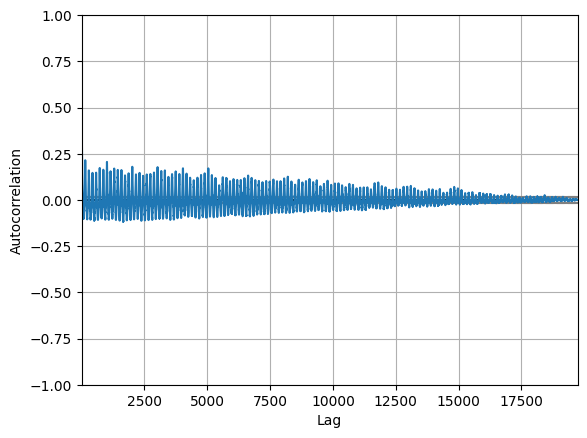

In [ ]:
from pandas.plotting import autocorrelation_plot
# Create lagged features (e.g., 10 minutes and 30 minutes ago)
data['Appliances_lag_10'] = data['Appliances'].shift(1)  # Lag of 10 minutes
data['Appliances_lag_30'] = data['Appliances'].shift(3)  # Lag of 30 minutes (assuming 10-minute intervals)

# can create more lag features depending on the analysis
data['Appliances_lag_60'] = data['Appliances'].shift(6)  # Lag of 60 minutes (assuming 10-minute intervals)

# Display the dataframe with lagged features
print(data[['date', 'Appliances', 'Appliances_lag_10', 'Appliances_lag_30', 'Appliances_lag_60']].head())

# Autocorrelation plot to visualize lag significance
autocorrelation_plot(data['Appliances'])
plt.show()

## 4. Interaction Features

In [ ]:
# Create interaction features
data['T1_RH_1_interaction'] = data['T1'] * data['RH_1']  # Interaction between indoor temperature and humidity
data['T_out_RH_out_interaction'] = data['T_out'] * data['RH_out']  # Interaction between outdoor temperature and humidity

# You can create more interaction terms as needed
data['T2_RH_2_interaction'] = data['T2'] * data['RH_2']  # Interaction between another indoor temperature and humidity
data['T1_T2_interaction'] = data['T1'] * data['T2']  # Interaction between indoor temperatures

# Display the dataframe with interaction features
print(data[['date', 'Appliances', 'T1_RH_1_interaction', 'T_out_RH_out_interaction', 'T2_RH_2_interaction', 'T1_T2_interaction']].head())

                 date  Appliances  T1_RH_1_interaction  \
0 2016-01-11 17:00:00          60            -2.122636   
1 2016-01-11 17:10:00          60            -1.861640   
2 2016-01-11 17:20:00          50            -1.747997   
3 2016-01-11 17:30:00          50            -1.680581   
4 2016-01-11 17:40:00          60            -1.757628   

   T_out_RH_out_interaction  T2_RH_2_interaction  T1_T2_interaction  
0                 -0.122493            -0.577668           0.602248  
1                 -0.141106            -0.568706           0.602248  
2                 -0.159718            -0.555984           0.602248  
3                 -0.178331            -0.551116           0.602248  
4                 -0.196944            -0.543150           0.602248  


## Domain-Specific Features

In [ ]:
#Create a 'weekend' feature (1 for weekends, 0 for weekdays)
data['date'] = pd.to_datetime(data['date'])  # Ensure the date column is in datetime format
data['weekend'] = data['date'].dt.weekday >= 5  # 1 for Saturday and Sunday, 0 for weekdays


In [ ]:
data['weekend'].head()

,weekend
0,False
1,False
2,False
3,False
4,False


In [ ]:
#Create a 'day_of_week' feature (indicating the day of the week)
data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
data['day_of_week'].head()

,day_of_week
0,0
1,0
2,0
3,0
4,0


In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rolling_mean_12,rolling_std_12,Appliances_lag_10,Appliances_lag_30,Appliances_lag_60,T1_RH_1_interaction,T_out_RH_out_interaction,T2_RH_2_interaction,T1_T2_interaction,weekend
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,NaN,NaN,NaN,NaN,NaN,-2.122636,-0.122493,-0.577668,0.602248,False
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,NaN,NaN,60.0,NaN,NaN,-1.861640,-0.141106,-0.568706,0.602248,False
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,NaN,NaN,60.0,NaN,NaN,-1.747997,-0.159718,-0.555984,0.602248,False
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,NaN,NaN,50.0,60.0,NaN,-1.680581,-0.178331,-0.551116,0.602248,False
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,NaN,NaN,50.0,60.0,NaN,-1.757628,-0.196944,-0.543150,0.602248,False


In [ ]:
categorical_cols = ['day_of_week', 'weekday', 'weekend']  # Add other categorical columns if needed.
categorical_data = data[categorical_cols]
print(categorical_data.head())

   day_of_week  weekday  weekend
0            0     True    False
1            0     True    False
2            0     True    False
3            0     True    False
4            0     True    False


In [ ]:
# Label Encoding for 'day_of_week'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['day_of_week'] = encoder.fit_transform(data['day_of_week'])

# Converting Boolean columns to integers
data['weekday'] = data['weekday'].astype(int)
data['weekend'] = data['weekend'].astype(int)

In [ ]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'hour', 'day_of_week', 'month',
       'weekday', 'rolling_mean_3', 'rolling_std_3', 'rolling_mean_6',
       'rolling_std_6', 'rolling_mean_12', 'rolling_std_12',
       'Appliances_lag_10', 'Appliances_lag_30', 'Appliances_lag_60',
       'T1_RH_1_interaction', 'T_out_RH_out_interaction',
       'T2_RH_2_interaction', 'T1_T2_interaction', 'weekend'],
      dtype='object')

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rolling_mean_12,rolling_std_12,Appliances_lag_10,Appliances_lag_30,Appliances_lag_60,T1_RH_1_interaction,T_out_RH_out_interaction,T2_RH_2_interaction,T1_T2_interaction,weekend
0,2016-01-11 17:00:00,60,3.301264,-1.139072,1.863478,-0.528718,1.092582,-1.245155,1.686863,-0.912635,...,NaN,NaN,NaN,NaN,NaN,-2.122636,-0.122493,-0.577668,0.602248,0
1,2016-01-11 17:10:00,60,3.301264,-1.139072,1.634348,-0.528718,1.075633,-1.245155,1.705307,-0.912635,...,NaN,NaN,60.0,NaN,NaN,-1.861640,-0.141106,-0.568706,0.602248,0
2,2016-01-11 17:20:00,50,3.301264,-1.139072,1.534580,-0.528718,1.051570,-1.245155,1.749367,-0.948663,...,NaN,NaN,60.0,NaN,NaN,-1.747997,-0.159718,-0.555984,0.602248,0
3,2016-01-11 17:30:00,50,4.561378,-1.139072,1.475395,-0.528718,1.042363,-1.245155,1.769859,-0.966677,...,NaN,NaN,50.0,60.0,NaN,-1.680581,-0.178331,-0.551116,0.602248,0
4,2016-01-11 17:40:00,60,4.561378,-1.139072,1.543034,-0.528718,1.027297,-1.245155,1.769859,-0.966677,...,NaN,NaN,50.0,60.0,NaN,-1.757628,-0.196944,-0.543150,0.602248,0


In [ ]:
# handle missing value
data.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


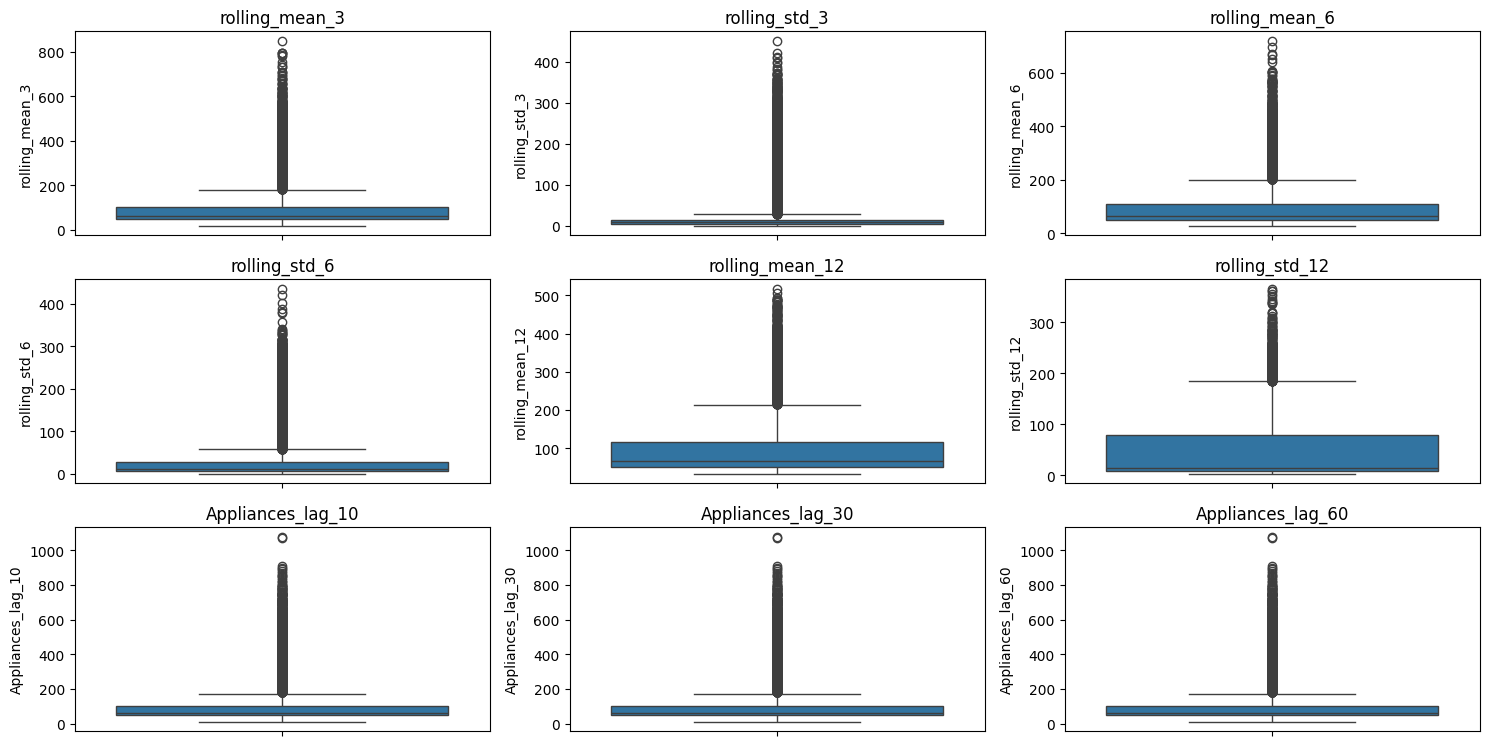

In [ ]:
# generate boxplot to features which have null values

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Create boxplots for features with null values
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
for i, col in enumerate(null_columns):
    plt.subplot(len(null_columns) // 3 + 1, 3, i + 1)  # Create subplots
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [ ]:
# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Fill null values with the median for each column
for col in null_columns:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)

# Verify that null values have been filled
print(data.isnull().sum())

date                        0
Appliances                  0
lights                      0
T1                          0
RH_1                        0
T2                          0
RH_2                        0
T3                          0
RH_3                        0
T4                          0
RH_4                        0
T5                          0
RH_5                        0
T6                          0
RH_6                        0
T7                          0
RH_7                        0
T8                          0
RH_8                        0
T9                          0
RH_9                        0
T_out                       0
Press_mm_hg                 0
RH_out                      0
Windspeed                   0
Visibility                  0
Tdewpoint                   0
rv1                         0
rv2                         0
hour                        0
day_of_week                 0
month                       0
weekday                     0
rolling_me

<ipython-input-21-e2f73601ef48>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


## 5. Feature Selection

In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X is the feature set and y is the target
X = data.drop(columns=['Appliances', 'date'])  # Drop target variable and 'date'
y = data['Appliances']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize a RandomForestRegressor model
model = RandomForestRegressor()

# Use RFE to select features
rfe = RFE(model, n_features_to_select=10)  # Change 10 to your desired number of features
rfe.fit(X_train, y_train)

# Get the selected features from RFE
rfe_selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", rfe_selected_features)

Selected features using RFE: Index(['RH_1', 'T8', 'rv2', 'rolling_mean_3', 'rolling_std_3',
       'rolling_mean_6', 'rolling_std_6', 'Appliances_lag_10',
       'Appliances_lag_30', 'T_out_RH_out_interaction'],
      dtype='object')


In [ ]:
#Feature Importance from Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train a Random Forest model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Select top 10 important features (adjust based on your needs)
tree_selected_features = feature_importance_df['Feature'].head(10).tolist()
print("Selected features using Tree-Based Model:", tree_selected_features)


Selected features using Tree-Based Model: ['rolling_mean_3', 'rolling_std_3', 'Appliances_lag_30', 'Appliances_lag_10', 'RH_1', 'rolling_std_6', 'rolling_mean_6', 'rolling_std_12', 'hour', 'rolling_mean_12']


In [ ]:
#Correlation Analysis

# Calculate correlation matrix
corr_matrix = X.corr()

# Find highly correlated features (threshold > 0.9, adjust based on your preference)
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # Threshold of 0.9
            high_corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

# Remove one feature from each highly correlated pair
to_remove = {pair[1] for pair in high_corr_pairs}
correlation_selected_features = [col for col in X.columns if col not in to_remove]
print("Selected features using Correlation Analysis:", correlation_selected_features)


Selected features using Correlation Analysis: ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'RH_3', 'T4', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2', 'hour', 'day_of_week', 'month', 'rolling_std_3', 'rolling_mean_6', 'rolling_std_6', 'rolling_mean_12', 'rolling_std_12', 'Appliances_lag_10', 'Appliances_lag_30', 'Appliances_lag_60', 'T1_RH_1_interaction', 'T_out_RH_out_interaction', 'T2_RH_2_interaction', 'T1_T2_interaction', 'weekend']


In [ ]:
# Combine features from all methods
final_selected_features = set(rfe_selected_features) & set(tree_selected_features) & set(correlation_selected_features)

print("Finalized selected features:", final_selected_features)

Finalized selected features: {'rolling_mean_6', 'RH_1', 'rolling_std_6', 'Appliances_lag_10', 'rolling_std_3', 'Appliances_lag_30'}


In [ ]:
# Subset the dataframe with the selected features
finalized_df = data[list(final_selected_features) + ['Appliances']]  # Add target variable 'Appliances' if needed



In [ ]:
finalized_df

,rolling_mean_6,RH_1,rolling_std_6,Appliances_lag_10,rolling_std_3,Appliances_lag_30,Appliances
0,63.333333,1.863478,11.690452,60.0,10.000000,60.0,60
1,63.333333,1.634348,11.690452,60.0,10.000000,60.0,60
2,63.333333,1.534580,11.690452,60.0,5.773503,60.0,50
3,63.333333,1.475395,11.690452,50.0,5.773503,60.0,50
4,63.333333,1.543034,11.690452,50.0,5.773503,60.0,60
...,...,...,...,...,...,...,...
19730,136.666667,1.600528,51.639778,90.0,10.000000,120.0,100
19731,115.000000,1.585309,33.911650,100.0,5.773503,110.0,90
19732,130.000000,1.609829,69.570109,90.0,101.159939,90.0,270
19733,180.000000,1.709597,136.528385,270.0,165.227116,100.0,420


In [ ]:
# prompt: scale features standardization in df without appliances

# Remove 'Appliances' column
df_features = finalized_df.drop('Appliances', axis=1)

# Scale features using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(scaled_features, columns=df_features.columns)

# Now df_scaled contains your standardized features without the 'Appliances' column
print(df_scaled.head())

   rolling_mean_6      RH_1  rolling_std_6  Appliances_lag_10  rolling_std_3  \
0        -0.42175  1.863478      -0.447349          -0.367589      -0.332697   
1        -0.42175  1.634348      -0.447349          -0.367589      -0.332697   
2        -0.42175  1.534580      -0.447349          -0.367589      -0.415141   
3        -0.42175  1.475395      -0.447349          -0.465155      -0.415141   
4        -0.42175  1.543034      -0.447349          -0.465155      -0.415141   

   Appliances_lag_30  
0          -0.367424  
1          -0.367424  
2          -0.367424  
3          -0.367424  
4          -0.367424  


In [ ]:
# Concatenate 'Appliances' column back to the scaled DataFrame
finalized_df = pd.concat([df_scaled, finalized_df['Appliances']], axis=1)

print(finalized_df.head())

   rolling_mean_6      RH_1  rolling_std_6  Appliances_lag_10  rolling_std_3  \
0        -0.42175  1.863478      -0.447349          -0.367589      -0.332697   
1        -0.42175  1.634348      -0.447349          -0.367589      -0.332697   
2        -0.42175  1.534580      -0.447349          -0.367589      -0.415141   
3        -0.42175  1.475395      -0.447349          -0.465155      -0.415141   
4        -0.42175  1.543034      -0.447349          -0.465155      -0.415141   

   Appliances_lag_30  Appliances  
0          -0.367424          60  
1          -0.367424          60  
2          -0.367424          50  
3          -0.367424          50  
4          -0.367424          60  


In [ ]:
# Save the finalized dataframe to a CSV
finalized_df.to_csv('/content/drive/My Drive/intern ai/finalized_features.csv', index=False)